In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("data.csv")
bakkal = pd.read_csv("bakkal.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [ ]:
df['Number of Rating'] = df['Number of Rating'].str.replace(",(\d{3})", "\\1")
df['Number of Rating'] = df['Number of Rating'].astype(int)

C:\Users\turkm\AppData\Local\Temp/ipykernel_2652/2221482621.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Number of Rating'] = df['Number of Rating'].str.replace(",(\d{3})", "\\1")


In [4]:
df['Installs'] = df['Installs'].str.replace(r'\D+', '')

C:\Users\turkm\AppData\Local\Temp/ipykernel_2652/2771373278.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Installs'] = df['Installs'].str.replace(r'\D+', '')


In [5]:
df['Installs'] = df['Installs'].astype(int)

In [6]:
df["target"] = np.log10(df.Installs)*df.Rating

In [7]:
columns = ['Name', 'Description', 'target']
df = df[columns]

In [8]:
df

,Name,Description,target
0,Geometry Dash Lite,Jump and fly your way through danger in this r...,35.200000
1,Fastlane: Road to Revenge,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,32.200000
2,Esports Life Tycoon | Manage your esports team,Manage your own esports team. Sign up the best...,12.000000
3,Armello,Armello is a grand swashbuckling adventure com...,25.645365
4,Adventure Bay - Paradise Farm,Welcome to your very own exotic cove! Adventur...,24.505571
...,...,...,...
2364,Alto's Odyssey,Just beyond the horizon sits a majestic desert...,31.500000
2365,Trucker Real Wheels - Simulator,"Take on the role of Trucker, transport various...",26.600000
2366,Random Dice: Wars,"Send your Dice army to WAR! Real-time, simple,...",22.795880
2367,Battle Racing Stars - Multiplayer Games,Battle Racing Stars is the new Halfbrick Studi...,28.200000


In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
# word_count
df['name_word_count'] = df['Name'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['name_unique_word_count'] = df['Name'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['name_stop_word_count'] = df['Name'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# mean_word_length
df['name_mean_word_length'] = df['Name'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['name_char_count'] = df['Name'].apply(lambda x: len(str(x)))

# punctuation_count
df['name_punctuation_count'] = df['Name'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [31]:
df

,Name,Description,target,name_word_count,name_unique_word_count,desciption_name_word_count,desciption_name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count
0,Geometry Dash Lite,Jump and fly your way through danger in this r...,35.200000,3,3,114,83,0,5.333333,18,0
1,Fastlane: Road to Revenge,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,32.200000,4,4,241,186,1,5.500000,25,1
2,Esports Life Tycoon | Manage your esports team,Manage your own esports team. Sign up the best...,12.000000,8,8,471,288,1,4.875000,46,1
3,Armello,Armello is a grand swashbuckling adventure com...,25.645365,1,1,286,211,0,7.000000,7,0
4,Adventure Bay - Paradise Farm,Welcome to your very own exotic cove! Adventur...,24.505571,5,5,239,174,0,5.000000,29,1
...,...,...,...,...,...,...,...,...,...,...,...
2364,Alto's Odyssey,Just beyond the horizon sits a majestic desert...,31.500000,2,2,299,206,0,6.500000,14,1
2365,Trucker Real Wheels - Simulator,"Take on the role of Trucker, transport various...",26.600000,5,5,287,172,0,5.400000,31,1
2366,Random Dice: Wars,"Send your Dice army to WAR! Real-time, simple,...",22.795880,3,3,303,194,0,5.000000,17,1
2367,Battle Racing Stars - Multiplayer Games,Battle Racing Stars is the new Halfbrick Studi...,28.200000,6,6,67,57,0,5.666667,39,1


In [10]:
df['desc_word_count'] = df['Description'].apply(lambda x: len(str(x).split()))

# unique_word_count
df['desc_unique_word_count'] = df['Description'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df['desc_stop_word_count'] = df['Description'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

# mean_word_length
df['desc_mean_word_length'] = df['Description'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df['desc_char_count'] = df['Description'].apply(lambda x: len(str(x)))

# punctuation_count
df['desc_punctuation_count'] = df['Description'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [11]:
df

,Name,Description,target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count
0,Geometry Dash Lite,Jump and fly your way through danger in this r...,35.200000,3,3,0,5.333333,18,0,114,83,36,5.271930,714,20
1,Fastlane: Road to Revenge,THEY TOOK YOUR CITY. THEY SHOULD’VE TAKEN YOUR...,32.200000,4,4,1,5.500000,25,1,241,186,72,5.804979,1639,119
2,Esports Life Tycoon | Manage your esports team,Manage your own esports team. Sign up the best...,12.000000,8,8,1,4.875000,46,1,471,288,184,5.180467,2910,64
3,Armello,Armello is a grand swashbuckling adventure com...,25.645365,1,1,0,7.000000,7,0,286,211,91,5.178322,1766,53
4,Adventure Bay - Paradise Farm,Welcome to your very own exotic cove! Adventur...,24.505571,5,5,0,5.000000,29,1,239,174,78,5.050209,1445,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,Alto's Odyssey,Just beyond the horizon sits a majestic desert...,31.500000,2,2,0,6.500000,14,1,299,206,105,5.130435,1832,57
2365,Trucker Real Wheels - Simulator,"Take on the role of Trucker, transport various...",26.600000,5,5,0,5.400000,31,1,287,172,108,4.867596,1683,57
2366,Random Dice: Wars,"Send your Dice army to WAR! Real-time, simple,...",22.795880,3,3,0,5.000000,17,1,303,194,67,5.788779,2056,146
2367,Battle Racing Stars - Multiplayer Games,Battle Racing Stars is the new Halfbrick Studi...,28.200000,6,6,0,5.666667,39,1,67,57,24,5.328358,423,23


C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

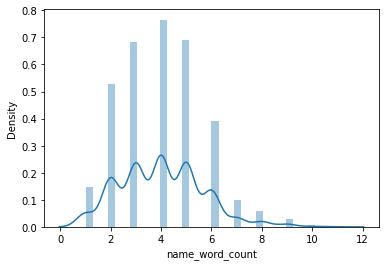

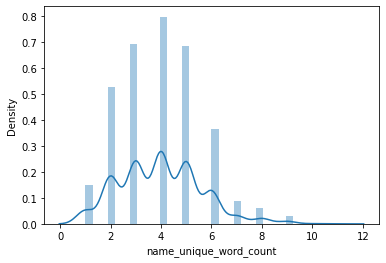

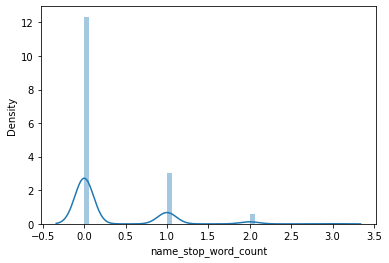

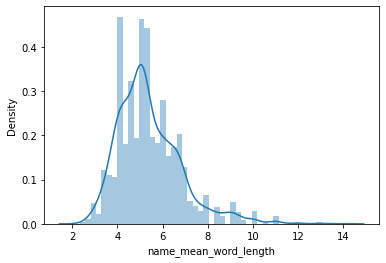

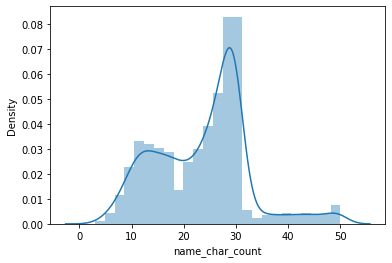

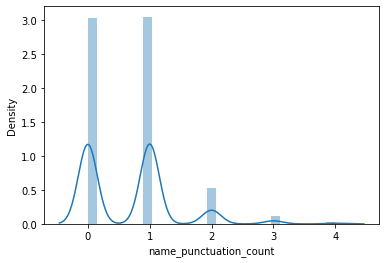

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

METAFEATURES = ['name_word_count', 'name_unique_word_count', 'name_stop_word_count', 'name_mean_word_length','name_char_count', 'name_punctuation_count']

for column in METAFEATURES:
    plt.figure()           
    sns.distplot(df[column])

C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\turkm\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

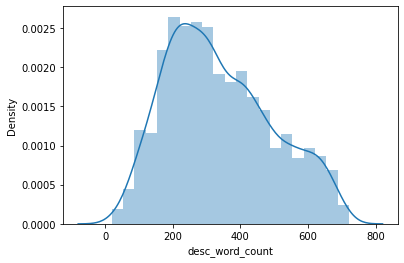

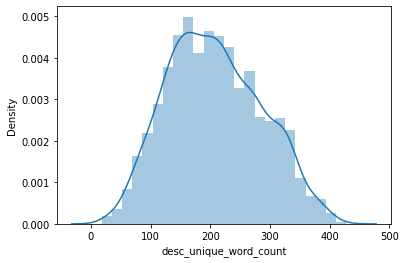

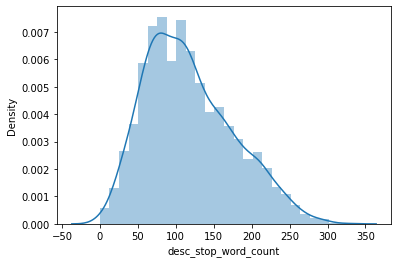

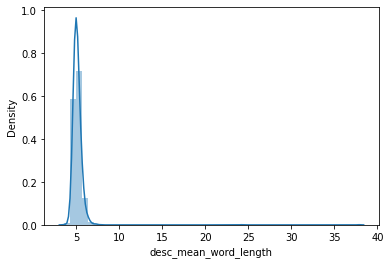

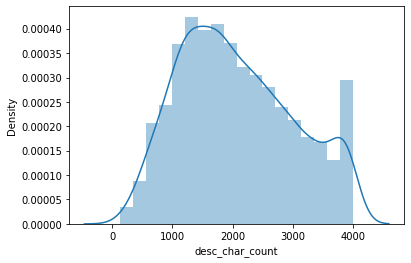

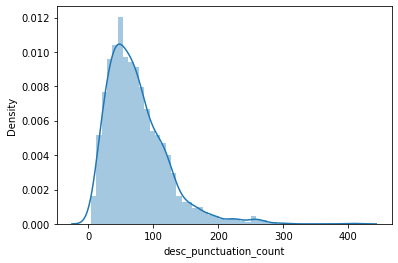

In [14]:

METAFEATURES = ['desc_word_count', 'desc_unique_word_count', 'desc_stop_word_count', 'desc_mean_word_length','desc_char_count', 'desc_punctuation_count']
for column in METAFEATURES:
    plt.figure()           
    sns.distplot(df[column])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    2369 non-null   object 
 1   Description             2369 non-null   object 
 2   target                  2369 non-null   float64
 3   name_word_count         2369 non-null   int64  
 4   name_unique_word_count  2369 non-null   int64  
 5   name_stop_word_count    2369 non-null   int64  
 6   name_mean_word_length   2369 non-null   float64
 7   name_char_count         2369 non-null   int64  
 8   name_punctuation_count  2369 non-null   int64  
 9   desc_word_count         2369 non-null   int64  
 10  desc_unique_word_count  2369 non-null   int64  
 11  desc_stop_word_count    2369 non-null   int64  
 12  desc_mean_word_length   2369 non-null   float64
 13  desc_char_count         2369 non-null   int64  
 14  desc_punctuation_count  2369 non-null   

**Text Preprocessing**

In [16]:
# Remove stopwords & convert to lower case
df['Name'] = df['Name'].apply(lambda x: ' '.join([w for w in str(x).lower().split() if w not in stop_words]))

# Remove Punctuations
df["Name"] = df['Name'].str.replace('[^\w\s]','')

df['Description'] = df['Description'].apply(lambda x: ' '.join([w for w in str(x).lower().split() if w not in stop_words]))

df["Description"] = df['Description'].str.replace('[^\w\s]','')

df.tail()

C:\Users\turkm\AppData\Local\Temp/ipykernel_2652/3458252543.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Name"] = df['Name'].str.replace('[^\w\s]','')
C:\Users\turkm\AppData\Local\Temp/ipykernel_2652/3458252543.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Description"] = df['Description'].str.replace('[^\w\s]','')


,Name,Description,target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count
2364,altos odyssey,beyond horizon sits majestic desert vast unexp...,31.500000,2,2,0,6.500000,14,1,299,206,105,5.130435,1832,57
2365,trucker real wheels simulator,take role trucker transport various cargoes ea...,26.600000,5,5,0,5.400000,31,1,287,172,108,4.867596,1683,57
2366,random dice wars,send dice army war realtime simple fun easy s...,22.795880,3,3,0,5.000000,17,1,303,194,67,5.788779,2056,146
2367,battle racing stars multiplayer games,battle racing stars new halfbrick studios game...,28.200000,6,6,0,5.666667,39,1,67,57,24,5.328358,423,23
2368,farmville 3 animals,start animal farm ground breeding building thr...,29.475468,4,4,0,4.500000,21,1,594,318,204,5.037037,3585,129


In [18]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\turkm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [19]:
df['token_name']=df['Name'].apply(lambda X: word_tokenize(X))
df['token_desc'] = df['Description'].apply(lambda X: word_tokenize(X))
df.head()

,Name,Description,target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count,token_name,token_desc
0,geometry dash lite,jump fly way danger rhythmbased action platfor...,35.200000,3,3,0,5.333333,18,0,114,83,36,5.271930,714,20,"[geometry, dash, lite]","[jump, fly, way, danger, rhythmbased, action, ..."
1,fastlane road revenge,took city shouldve taken car reclaim no1 posit...,32.200000,4,4,1,5.500000,25,1,241,186,72,5.804979,1639,119,"[fastlane, road, revenge]","[took, city, shouldve, taken, car, reclaim, no..."
2,esports life tycoon manage esports team,manage esports team sign best players train su...,12.000000,8,8,1,4.875000,46,1,471,288,184,5.180467,2910,64,"[esports, life, tycoon, manage, esports, team]","[manage, esports, team, sign, best, players, t..."
3,armello,armello grand swashbuckling adventure combinin...,25.645365,1,1,0,7.000000,7,0,286,211,91,5.178322,1766,53,[armello],"[armello, grand, swashbuckling, adventure, com..."
4,adventure bay paradise farm,welcome exotic cove adventure bay paradise fa...,24.505571,5,5,0,5.000000,29,1,239,174,78,5.050209,1445,44,"[adventure, bay, paradise, farm]","[welcome, exotic, cove, adventure, bay, paradi..."


In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\turkm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\turkm\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [24]:
#lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in text]

df["token_name"] = df["token_name"].apply(lemmatize_text)
df["token_desc"] = df["token_desc"].apply(lemmatize_text)

In [25]:
df.tail(10)

,Name,Description,target,name_word_count,name_unique_word_count,name_stop_word_count,name_mean_word_length,name_char_count,name_punctuation_count,desc_word_count,desc_unique_word_count,desc_stop_word_count,desc_mean_word_length,desc_char_count,desc_punctuation_count,token_name,token_desc
2359,zumba 2022,super fan zumba montezuma games answer yes zum...,26.785159,2,2,0,4.500000,10,0,207,125,66,4.584541,1155,33,"[zumba, 2022]","[super, fan, zumba, montezuma, game, answer, y..."
2360,duet,enter mesmerising trance codependence duet rul...,31.500000,1,1,0,4.000000,4,0,450,283,158,5.175556,2778,68,[duet],"[enter, mesmerising, trance, codependence, due..."
2361,chaos battle league pvp action game,its time create chaos command iconic character...,24.600000,7,7,0,4.428571,37,1,262,171,94,5.450382,1690,56,"[chaos, battle, league, pvp, action, game]","[it, time, create, chaos, command, iconic, cha..."
2362,pacific warships naval pvp,pacific warships world naval battle play fre...,28.135674,4,4,0,6.000000,27,1,630,388,194,5.077778,3828,97,"[pacific, warship, naval, pvp]","[pacific, warship, world, naval, battle, play,..."
2363,farming simulator 18,become modern farmer farming simulator 18 imme...,25.800000,3,3,0,6.000000,20,0,266,162,86,4.928571,1576,29,"[farming, simulator, 18]","[become, modern, farmer, farming, simulator, 1..."
2364,altos odyssey,beyond horizon sits majestic desert vast unexp...,31.500000,2,2,0,6.500000,14,1,299,206,105,5.130435,1832,57,"[alto, odyssey]","[beyond, horizon, sits, majestic, desert, vast..."
2365,trucker real wheels simulator,take role trucker transport various cargoes ea...,26.600000,5,5,0,5.400000,31,1,287,172,108,4.867596,1683,57,"[trucker, real, wheel, simulator]","[take, role, trucker, transport, various, carg..."
2366,random dice wars,send dice army war realtime simple fun easy s...,22.795880,3,3,0,5.000000,17,1,303,194,67,5.788779,2056,146,"[random, dice, war]","[send, dice, army, war, realtime, simple, fun,..."
2367,battle racing stars multiplayer games,battle racing stars new halfbrick studios game...,28.200000,6,6,0,5.666667,39,1,67,57,24,5.328358,423,23,"[battle, racing, star, multiplayer, game]","[battle, racing, star, new, halfbrick, studio,..."
2368,farmville 3 animals,start animal farm ground breeding building thr...,29.475468,4,4,0,4.500000,21,1,594,318,204,5.037037,3585,129,"[farmville, 3, animal]","[start, animal, farm, ground, breeding, buildi..."


In [26]:
df.to_csv('final.csv')

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop(['target'], axis=1)
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
X_train = X_train.token_desc.values
X_test = X_test.token_desc.values

In [34]:
OOV_TOKEN = '<OOV>'
VOCAB_SIZE = 10000
MAX_LEN = 100
EMBEDDING_DIM = 100

tokenizer = Tokenizer(
    num_words=VOCAB_SIZE,
    oov_token=OOV_TOKEN
)

tokenizer.fit_on_texts(X_train)


In [39]:
train_seq = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(
    train_seq, maxlen=MAX_LEN, dtype='int32', padding='post',
    truncating='post'
)

test_seq = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(
    test_seq, maxlen=MAX_LEN, dtype='int32', padding='post',
    truncating='post'
)

In [40]:
test_padded.shape

(593, 100)

In [50]:
model = tf.keras.Sequential([
  Embedding(VOCAB_SIZE, EMBEDDING_DIM, name="embedding"),
    LSTM(80),
    Dropout(0.35),
  Dense(512, activation='relu'),
    Dropout(0.7),
  Dense(256,activation='relu'),
    Dropout(0.7),
  Dense(1,activation='relu')
])


In [51]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 lstm_2 (LSTM)               (None, 80)                57920     
                                                                 
 dropout_6 (Dropout)         (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 512)               41472     
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_8 (Dropout)         (None, 256)              

In [44]:
es = EarlyStopping(patience=6, 
                   monitor='loss', 
                   restore_best_weights=True, 
                   mode='min', 
                   verbose=1)

In [55]:
hist = model.fit(
    train_padded,
    y = y_train,
    validation_data=(test_padded, y_test),
    epochs=7,
    callbacks=es
)

Epoch 1/7
56/56 [==============================] - 3s 50ms/step - loss: 27.5814 - val_loss: 37.7886
Epoch 2/7
56/56 [==============================] - 3s 50ms/step - loss: 24.9039 - val_loss: 33.4929
Epoch 3/7
56/56 [==============================] - 3s 50ms/step - loss: 24.4220 - val_loss: 34.3562
Epoch 4/7
56/56 [==============================] - 3s 50ms/step - loss: 24.3339 - val_loss: 33.3447
Epoch 5/7
56/56 [==============================] - 3s 51ms/step - loss: 23.2595 - val_loss: 33.3337
Epoch 6/7
56/56 [==============================] - 3s 51ms/step - loss: 24.2967 - val_loss: 31.4202
Epoch 7/7
56/56 [==============================] - 3s 50ms/step - loss: 22.4229 - val_loss: 32.1784


In [56]:
result_lstm = model.predict(test_padded)

In [58]:
result_lstm

array([[26.112827],
       [26.355648],
       [25.619324],
       [25.130505],
       [27.756561],
       [25.358482],
       [29.918072],
       [29.137402],
       [33.522976],
       [27.72633 ],
       [23.233128],
       [30.605217],
       [27.002254],
       [29.363157],
       [26.490658],
       [30.14044 ],
       [29.536602],
       [25.356144],
       [23.727161],
       [25.303984],
       [29.15841 ],
       [28.152725],
       [28.030865],
       [25.784962],
       [25.408287],
       [28.267887],
       [24.16193 ],
       [23.901642],
       [22.095537],
       [25.477404],
       [29.31697 ],
       [30.159546],
       [24.357227],
       [29.718807],
       [27.403164],
       [27.780365],
       [24.385937],
       [26.211796],
       [26.540756],
       [26.759823],
       [29.281244],
       [30.124706],
       [24.346802],
       [32.52354 ],
       [26.563065],
       [25.573673],
       [26.195652],
       [23.656334],
       [26.282776],
       [26.84708 ],


In [62]:
y_test

1094    27.600000
188     26.600000
1800    32.335674
707     23.000000
679     28.805571
          ...    
1576    25.800000
115     35.415262
741     16.800000
1383    32.200000
2211    33.600000
Name: target, Length: 593, dtype: float64

In [63]:
nlp = y_test.to_frame()

In [64]:
nlp

,target
1094,27.600000
188,26.600000
1800,32.335674
707,23.000000
679,28.805571
...,...
1576,25.800000
115,35.415262
741,16.800000
1383,32.200000


In [65]:
nlp["lstm_result"] = result_lstm

In [66]:
nlp

,target,lstm_result
1094,27.600000,26.112827
188,26.600000,26.355648
1800,32.335674,25.619324
707,23.000000,25.130505
679,28.805571,27.756561
...,...,...
1576,25.800000,23.694843
115,35.415262,23.865990
741,16.800000,26.076307
1383,32.200000,25.304338


In [67]:
nlp.to_csv('lstm.csv')